# Part 1

In [1]:
from graphviz import Graph, Digraph

def example(num):
    g = mygraph()
    if num == 1:
        g.node("A")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "B")
    elif num == 2:
        g.edge("A", "B")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "E")
        g.edge("A", "E")
    elif num == 3:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
    elif num == 4:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
        g.edge("E", "Z")
        g.edge("C", "Z")
        g.edge("B", "A")
    elif num == 5:
        width = 8
        height = 4
        for L1 in range(height-1):
            L2 = L1 + 1
            for i in range(width-(height-L1-1)):
                for j in range(width-(height-L2-1)):
                    node1 = str(L1)+"-"+str(i)
                    node2 = str(L2)+"-"+str(j)
                    g.edge(node1, node2)
    else:
        raise Exception("no such example")
    return g

# Breadth First Search (BFS)

(A, B, E, Z)


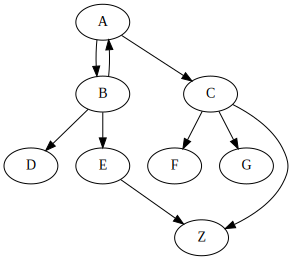

In [2]:
from collections import deque

class mygraph:
    def __init__(self):
        # name => Node
        self.nodes = {}
        self.visited = set()
    
    def node(self, name):
        node = Node(name)
        self.nodes[name] = node
        node.graph = self
    
    def edge(self, src, dst):
        # automatically add missing nodes
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])
        
    def _repr_svg_(self):
        # draw nodes+edges, non-recursively!
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_svg_()
    
    def find(self, src, dst):
        self.visited = set()
        return self.nodes[src].find(self.nodes[dst])

class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.graph = None # back reference
        self.finder = None # node that discovered me!
        
    def __repr__(self):
        return self.name
    
    # DFS: not even recursive
    # version 1: just return True/False
    # version 2: return a path (like we did with DFS)
    def find(self, dst):
        todo = deque([self])   # nodes to check (start from the front)
        added = {self}  # nodes we have already put on the list once
        self.finder = None
        while len(todo) > 0:
            #print("TODO:", todo, "PREV ADDED", added)
            curr = todo.pop() # right
            #print("CHECK", curr)

            # 1. check it
            if curr == dst:
                return curr.backtrace()

            # 2. add any new work we find to end of list
            for child in reversed(curr.children):
                if not child in added:
                    child.finder = curr
                    todo.append(child)
                    added.add(child)
            
        return None
            
    def backtrace(self):
        L = []
        curr = self
        while curr != None:
            L.append(curr)
            curr = curr.finder
        return tuple(reversed(L))

g = example(4)
print(g.find("A", "Z"))
g

# Part 2

In [3]:
%matplotlib inline

Text(0, 0.5, 'Microseconds')

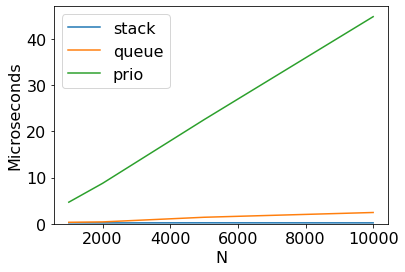

In [4]:
import time, random
import pandas as pd
import matplotlib.pyplot as plt

iters = 1000

def benchmark_microsec(data, pattern):
    t0 = time.time()
    # measure bad ways to implement the patters (all with a list!)
    for i in range(iters):
        if pattern == "stack":
            data.append(i % 10)
            _ = data.pop(-1)
        elif pattern == "queue":
            data.append(i % 10)
            _ = data.pop(0)
        elif pattern == "prio":
            data.append(i % 10)
            data.sort()
            _ = data.pop(0)
        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in [1000,2000,5000,10000]:
    df.loc[N,"stack"] = benchmark_microsec([1]*N, "stack")
    df.loc[N,"queue"] = benchmark_microsec([1]*N, "queue")
    df.loc[N,"prio"] = benchmark_microsec([1]*N, "prio")

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")

In [5]:
from collections import deque
d = deque([])
d.append(1) # O(1) -- fast!
d.append(3)
d.append(2)
print(d)
print(d.popleft()) # O(1) -- fast too!
print(d)

deque([1, 3, 2])
1
deque([3, 2])


In [6]:
import heapq
heap = []
for x in [5,3,1,4,2]:
    # O(log N) -- must faster than O(N log N) for search
    heapq.heappush(heap, x)
heap

[1, 2, 3, 5, 4]

In [7]:
while len(heap) > 0:
    x = heapq.heappop(heap) # O(log N)
    print(x, heap)

1 [2, 4, 3, 5]
2 [3, 4, 5]
3 [4, 5]
4 [5]
5 []
